# Intro

Apply normalization to re-shaped images

# Setup 

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import skimage
from skimage import transform

%matplotlib inline

# Images path

In [2]:
ad_data_dir='Documents/projet_final/project/data/sample/AD-numpyArr'
cn_data_dir='Documents/projet_final/project/data/sample/CN-numpyArr'
mci_data_dir='Documents/projet_final/project/data/sample/MCI-numpyArr'

# Normalization

I would normalize between -0.5 and 0.5

## Load images and define 
* total number of pixels in the image
* mean of the pixels in the image
* maximum value of pixels in the image

In [3]:
totalnum=[]         #total number of pixels in the image
mean=[]             #mean of the pixels in the image
nummax=[]           #maximum value of pixels in the image

converted_shape = (21,42,42)

#For AD data
for file in os.listdir(ad_data_dir):
    # call load_data with allow_pickle implicitly set to true
    img = np.load(os.path.join(ad_data_dir,file),allow_pickle=True) 
    #Confiem that images are shaped
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(ad_data_dir,file),img)
    #Pixels Mean  
    mean.append(np.mean(img[0][0]))
    #Total pixels
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    #Max pixels
    nummax.append(np.max(img[0][0]))

    #For CN data    
for file in os.listdir(cn_data_dir):
    img = np.load(os.path.join(cn_data_dir, file),allow_pickle=True)
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(cn_data_dir,file),img)
    
    mean.append(np.mean(img[0][0]))
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    nummax.append(np.max(img[0][0]))

    #For MCI data    
for file in os.listdir(mci_data_dir):
    img = np.load(os.path.join(mci_data_dir, file),allow_pickle=True)
    if(img[0][0].shape != converted_shape):
        img[0][0] = skimage.transform.resize(img[0][0], converted_shape)
        np.save(os.path.join(mci_data_dir,file),img)
        
    mean.append(np.mean(img[0][0]))
    totalnum.append((img[0][0].shape[0]*img[0][0].shape[1]*img[0][0].shape[2]))
    nummax.append(np.max(img[0][0]))

#mean value for the full dataset
nummean=np.vdot(mean,totalnum)/np.sum(totalnum) 
print(nummean)

#max value for the full dataset
nummax=np.max(nummax) 
print(nummax)

138.34743505420911
5184.964121795549


## Apply normalization formula and save the new images

(x-mean / max value)

In [4]:
# Save the new images
for file in os.listdir(ad_data_dir):
    img = np.load(os.path.join(ad_data_dir,file),allow_pickle=True)
    #normalisation(x-mean/max value)
    img[0][0]=(img[0][0]-nummean)/nummax                 
    np.save(os.path.join(ad_data_dir,file),img)
for file in os.listdir(cn_data_dir):
    img = np.load(os.path.join(cn_data_dir, file),allow_pickle=True)
    img[0][0] =(img[0][0] - nummean) / nummax
    np.save(os.path.join(cn_data_dir,file),img)
for file in os.listdir(mci_data_dir):
    img = np.load(os.path.join(mci_data_dir, file),allow_pickle=True)
    img[0][0] =(img[0][0] - nummean) / nummax
    np.save(os.path.join(mci_data_dir, file),img)

# Visualize normalized images

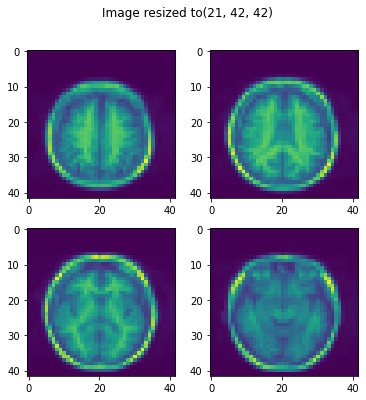

In [7]:
datanp=[]                               #images
truenp=[]                               #labels

data_dir = 'Documents/projet_final/project/data/sample/CN-numpyArr'
for file in os.listdir(data_dir):
    data=np.load(os.path.join(data_dir,file),allow_pickle=True)
    datanp.append((data[0][0]))
    truenp.append(data[0][1])
    
img = datanp[0]  # loading the image

fig, axs1 = plt.subplots(2, 2,figsize= (6,6))

fig.suptitle('Image resized to'+str(img.shape))
i = 7
axs1[0, 0].imshow(img[i])

axs1[0, 1].imshow(img[i+1])

axs1[1, 0].imshow(img[i+2])

axs1[1, 1].imshow(img[i+3])


In [9]:
img

array([[[-0.02668077, -0.02668113, -0.02668001, ..., -0.02668156,
         -0.02668237, -0.02668158],
        [-0.0266601 , -0.02666776, -0.0266442 , ..., -0.02666211,
         -0.02668006, -0.02666111],
        [-0.02666398, -0.02666725, -0.02666518, ..., -0.02666649,
         -0.02667714, -0.02666327],
        ...,
        [-0.02667227, -0.02664585, -0.02664473, ..., -0.02651265,
         -0.02662798, -0.02667446],
        [-0.0266682 , -0.02667339, -0.02667208, ..., -0.02661133,
         -0.02665518, -0.02667755],
        [-0.02668225, -0.02668236, -0.02668235, ..., -0.02668174,
         -0.02668224, -0.02668239]],

       [[-0.02668098, -0.0266812 , -0.02668065, ..., -0.02668048,
         -0.02668233, -0.02668109],
        [-0.02665778, -0.02665083, -0.02664169, ..., -0.02663593,
         -0.02667919, -0.02664957],
        [-0.02664216, -0.02655445, -0.02658787, ..., -0.02665233,
         -0.02667755, -0.02666122],
        ...,
        [-0.02666159, -0.02663434, -0.02663878, ..., -

Try this other formula too (X − minX / maxX − minX) − 0.5